# Análise de letras da Taylor Swift com Python e Machine Learning 🎤🎶✨

Taylor Alison Swift é uma cantora, compositora, musicista, atriz, diretora, roteirista norte-americana que nasceu no estado da Pensivânia nos Estados Unidos da América. Considerada uma das maiores artistas da atualidade, suas composições são emotivas e marcantes inspiradas em experiências pessoas, ou não, já receberam vários prêmios ao longo de sua carreira.

Aqui analisaremos suas composições ao longos dos anos, em busca de padrões e análise de sentimentos.



## Bibliotecas

O primeiro passo é importar as bibliotecas necessárias para o desenvolvimento do projeto.

In [1]:
%matplotlib inline

import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

## Base de Dados

### Sobre a Base de Dados

A base de dados que será usada nesse projeto foi publicada no [Kaggle](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-song-lyrics-all-albums) por Jan Llenzl Dagohoy e possui todos os álbuns lançados pela Taylor Swift até 20 de outubro de 2022. Sendo eles:

* Taylor Swift (2006)
* Fearless (2008)
* Speak Now (2010)
* Red (2012)
* 1989 (2014)
* Reputation (2017)
* Lover (2019)
* Folklore (2020)
* Evermore (2020)

Portanto, a base de dados não possui o Midnights, seu último trabalho, lançado em 21 de outubro de 2022 e os álbuns Speak Now e Red não são Taylor's Version. Precisando, assim, de uma adaptação.

## Carregando a Base de Dados

Precisamos carregar a base de dados para inicarmos o desenvolvimento do projeto. Aqui carregarei os arquivos direto do meu Google Drive, mas sinta-se à vontade para carregar de qualquer lugar que quiser.

In [2]:
# preparando o ambiente para carregar a base de dados
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Os arquivos das letras estão separados por álbum, por isso, precisamos carregá-los individualmente e depois juntar em um só.

In [3]:
# taylor swift (2006)
# usando o meu caminho
ts = pd.read_csv("/content/drive/My Drive/lyrics/01-taylor_swift.csv")
ts.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5

In [4]:
# fearless (taylor's version) (2008)
fl = pd.read_csv("/content/drive/My Drive/lyrics/02-fearless_taylors_version.csv")
fl.head()

album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   

                                               lyric  line  
0                    There's something 'bout the way     1  
1             The street looks when it's just rained     2  
2  There's a glow off the pavement, you walk me t...     3  
3  And you know I wanna ask you to dance right there     4  
4             In the middle of the parking lot, yeah     5

In [5]:
# speak now taylor's version (2010)
sn = pd.read_csv("/content/drive/My Drive/lyrics/03-speak_now_taylors_version.csv")
sn.head()

album_name              track_title  track_n  \
0  Speak Now Taylor's Version  Mine (Taylor’s Version)        1   
1  Speak Now Taylor's Version  Mine (Taylor’s Version)        1   
2  Speak Now Taylor's Version  Mine (Taylor’s Version)        1   
3  Speak Now Taylor's Version  Mine (Taylor’s Version)        1   
4  Speak Now Taylor's Version  Mine (Taylor’s Version)        1   

                                               lyric  line  
0                                       Ah-ah, ah-ah     1  
1                                       Ah-ah, ah-ah     2  
2  You were in college working part-time, waiting...     3  
3               Left a small town, never looked back     4  
4         I was a flight risk with a fear of falling     5

In [6]:
# red taylor's version (2012)
red = pd.read_csv("/content/drive/My Drive/lyrics/04-red_taylors_version.csv")
red.head()

album_name                        track_title  track_n  \
0  Red (Taylor’s Version)  State of Grace (Taylor’s Version)        1   
1  Red (Taylor’s Version)  State of Grace (Taylor’s Version)        1   
2  Red (Taylor’s Version)  State of Grace (Taylor’s Version)        1   
3  Red (Taylor’s Version)  State of Grace (Taylor’s Version)        1   
4  Red (Taylor’s Version)  State of Grace (Taylor’s Version)        1   

                                         lyric  line  
0  I'm walkin' fast through the traffic lights     1  
1                  Busy streets and busy lives     2  
2              And all we know is touch and go     3  
3         We are alone with our changing minds     4  
4      We fall in love 'til it hurts or bleeds     5

In [7]:
# 1989 (2014)
um989 = pd.read_csv("/content/drive/My Drive/lyrics/05-1989_deluxe.csv")
um989.head()

album_name          track_title  track_n  \
0  1989 (Deluxe)  Welcome to New York        1   
1  1989 (Deluxe)  Welcome to New York        1   
2  1989 (Deluxe)  Welcome to New York        1   
3  1989 (Deluxe)  Welcome to New York        1   
4  1989 (Deluxe)  Welcome to New York        1   

                                           lyric  line  
0  Walking through a crowd, the village is aglow     1  
1    Kaleidoscope of loud heartbeats under coats     2  
2           Everybody here wanted something more     3  
3   Searching for a sound we hadn't heard before     4  
4                                    And it said     5

In [8]:
# reputation (2017)
rep = pd.read_csv("/content/drive/My Drive/lyrics/06-reputation.csv")
rep.head()

album_name       track_title  track_n  \
0  reputation  ...Ready for It?        1   
1  reputation  ...Ready for It?        1   
2  reputation  ...Ready for It?        1   
3  reputation  ...Ready for It?        1   
4  reputation  ...Ready for It?        1   

                                               lyric  line  
0     Knew he was a killer first time that I saw him     1  
1  Wondered how many girls he had loved and left ...     2  
2       But if he's a ghost, then I can be a phantom     3  
3                       Holdin' him for ransom, some     4  
4  Some boys are tryin' too hard, he don't try at...     5

In [9]:
# lover (2019)
lover = pd.read_csv("/content/drive/My Drive/lyrics/07-lover.csv")
lover.head()

album_name                track_title  track_n  \
0      Lover  I Forgot That You Existed        1   
1      Lover  I Forgot That You Existed        1   
2      Lover  I Forgot That You Existed        1   
3      Lover  I Forgot That You Existed        1   
4      Lover  I Forgot That You Existed        1   

                                          lyric  line  
0            How many days did I spend thinking     1  
1     'Bout how you did me wrong, wrong, wrong?     2  
2          Lived in the shade you were throwing     3  
3  'Til all of my sunshine was gone, gone, gone     4  
4               And I couldn't get away from ya     5

In [10]:
# folklore (2020)
folk = pd.read_csv("/content/drive/My Drive/lyrics/08-folklore_deluxe_version.csv")
folk.head()

album_name track_title  track_n  \
0  folklore (deluxe version)       the 1        1   
1  folklore (deluxe version)       the 1        1   
2  folklore (deluxe version)       the 1        1   
3  folklore (deluxe version)       the 1        1   
4  folklore (deluxe version)       the 1        1   

                                               lyric  line  
0               I'm doing good, I'm on some new shit     1  
1                  Been saying "yes" instead of "no"     2  
2  I thought I saw you at the bus stop, I didn't ...     3  
3                I hit the ground running each night     4  
4                           I hit the Sunday matinée     5

In [11]:
# evermore (2020)
eve = pd.read_csv("/content/drive/My Drive/lyrics/09-evermore_deluxe_version.csv")
eve.head()

album_name track_title  track_n  \
0  evermore (deluxe version)      willow        1   
1  evermore (deluxe version)      willow        1   
2  evermore (deluxe version)      willow        1   
3  evermore (deluxe version)      willow        1   
4  evermore (deluxe version)      willow        1   

                                               lyric  line  
0  I'm like the water when your ship rolled in th...     1  
1  Rough on the surface, but you cut through like...     2  
2                    And if it was an open-shut case     3  
3  I never would've known from that look on your ...     4  
4         Lost in your current like a priceless wine     5

In [12]:
# midnights (2022)
mn = pd.read_csv("/content/drive/My Drive/lyrics/10-midnights_til_dawn_edition.csv")
mn.head()

album_name    track_title  track_n  \
0  Midnights (The Til Dawn Edition)  Lavender Haze        1   
1  Midnights (The Til Dawn Edition)  Lavender Haze        1   
2  Midnights (The Til Dawn Edition)  Lavender Haze        1   
3  Midnights (The Til Dawn Edition)  Lavender Haze        1   
4  Midnights (The Til Dawn Edition)  Lavender Haze        1   

                             lyric  line  
0              Meet me at midnight     1  
1  Staring at the ceiling with you     2  
2  Oh, you don't ever say too much     3  
3   And you don't really read into     4  
4                   My melancholia     5

Agora que temos todos os álbuns carregados, iremos concatenar todos em um só.

In [13]:
# concatenando todos
lyrics = pd.concat([ts, fl, sn, red, um989, rep, lover, folk, eve, mn])
lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5

Enfim temos a nossa base de dados com todos os álbuns corretamente adicionados.

In [14]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10203 entries, 0 to 1195
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   10203 non-null  object
 1   track_title  10203 non-null  object
 2   track_n      10203 non-null  int64 
 3   lyric        10203 non-null  object
 4   line         10203 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 478.3+ KB


## Adicionando informações essenciais

Precisamos adicionar algumas informações que são essenciais ao nosso projeto. Como vamos fazer uma análise das composições da Taylor Swift ao longo dos anos, ter a data de lançamento de cada álbum é essencial, mas a nossa base de dados não possui essa informação. Por isso, precisamos adicionar os anos.

In [15]:
# lista de todos os álbuns na base de dados
nomes = lyrics.album_name.unique()
print(nomes)

['Taylor Swift' 'Fearless (Taylor’s Version)' "Speak Now Taylor's Version"
 'Red (Taylor’s Version)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)'
 'Midnights (The Til Dawn Edition)']


In [16]:
def album_release(row):
  '''
  função que mapeia o álbum a uma data de lançamento
  '''
  if row['album_name'] == nomes[0]:
      return '2006'
  elif row['album_name'] == nomes[1]:
      return '2008'
  elif row['album_name'] == nomes[2]:
      return '2010'
  elif row['album_name'] == nomes[3]:
      return '2012'
  elif row['album_name'] == nomes[4]:
      return '2014'
  elif row['album_name'] == nomes[5]:
      return '2017'
  elif row['album_name'] == nomes[6]:
      return '2019'
  elif row['album_name'] == nomes[7]:
      return '2020'
  # sabemos que folklore e evermore foram lançados no mesmo ano, mas para facilitar nossa análise, colocaremos anos distintos
  elif row['album_name'] == nomes[8]:
      return '2021'
  #this is slightly differently formatted because the album name is recorded two ways.
  elif row['album_name'] == 'Midnights (The Til Dawn Edition)':
      return '2022'

  return 'No Date'

lyrics['album_year'] = lyrics.apply(lambda row: album_release(row), axis=1)

lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  
0          He said the way my blue eyes shined     1       2006  
1  Put those Georgia stars to shame that night     2       2006  
2                       I said, "That's a lie"     3       2006  
3                  Just a boy in a Chevy truck     4       2006  
4         That had a tendency of gettin' stuck     5       2006

## Limpando o Texto

A fim de melhorar nossos resultados, precisamos limpar nossos textos. Assim, iremos:

* Colocar todo o texto em letras minúsculas;
* Remover pontuação;
* Excluir as stops words;

In [17]:
# colocando tudo em minúsculo
lyrics['clean_lyric'] = lyrics['lyric'].str.lower()
lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  \
0          He said the way my blue eyes shined     1       2006   
1  Put those Georgia stars to shame that night     2       2006   
2                       I said, "That's a lie"     3       2006   
3                  Just a boy in a Chevy truck     4       2006   
4         That had a tendency of gettin' stuck     5       2006   

                                   clean_lyric  
0          he said the way my blue eyes shined  
1  put those georgia stars to shame that night  
2                       i said, "that's a lie"  
3                  just a boy in a chevy truck  
4         that had a tendency of gettin' stuck

In [18]:
# removendo pontuação
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]', '')
lyrics.head()

<ipython-input-18-a97e8a5c3d49>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]', '')


album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  \
0          He said the way my blue eyes shined     1       2006   
1  Put those Georgia stars to shame that night     2       2006   
2                       I said, "That's a lie"     3       2006   
3                  Just a boy in a Chevy truck     4       2006   
4         That had a tendency of gettin' stuck     5       2006   

                                   clean_lyric  
0          he said the way my blue eyes shined  
1  put those georgia stars to shame that night  
2                           i said thats a lie  
3                  just a boy in a chevy truck  
4          that had a tendency of gettin stuck

In [169]:
# removendo stop words
nltk.download('stopwords')
stop = ['the', 'hes', 'cant', 'isnt', 'shes', 'he s', 'could', 'dont', 'don t', 'am', 'im', 'youre', 'thats', 'ill', 'id', 'ive', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself' 'through', 'during', 'before', 'after', 'above', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'or', 'as', 'of', 'at', 'by', 'for', 'with', 'into', 'through', 'during', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'such', 'some', 'other', 'than', 'too', 's', 'only', 't', 'will', 'can', 'm', 'o', 'd', 're', 've', 'y', 'ain', 'aren', "aren't", 'll', 'arent', 'n', 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn' ]
print(stop)

['the', 'hes', 'cant', 'isnt', 'shes', 'he s', 'could', 'dont', 'don t', 'am', 'im', 'youre', 'thats', 'ill', 'id', 'ive', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himselfthrough', 'during', 'before', 'after', 'above', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'or', 'as', 'of', 'at', 'by', 'for', 'with', 'into', 'through', 'during', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'such', 'some', 'other', 'than', 'too', 's', 'only', 't', 'will', 'can', 'm', 'o', 'd', 're', 've', 'y', 'ain', 'aren', "aren't", 'll', 'arent', 'n', 'couldn', "couldn't", 'didn',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  \
0          He said the way my blue eyes shined     1       2006   
1  Put those Georgia stars to shame that night     2       2006   
2                       I said, "That's a lie"     3       2006   
3                  Just a boy in a Chevy truck     4       2006   
4         That had a tendency of gettin' stuck     5       2006   

                     clean_lyric                           lyrics_tok  \
0      said way blue eyes shined      [said, way, blue, eyes, shined]   
1  put georgia stars shame night  [put, georgia, stars, shame, night]   
2                       said lie                          [said, lie]   
3                boy chevy truck                  [boy, chevy, truck]   
4          tendency gettin stuck            [tendency, gettin, stuck]   

                                            polarity    neg    neu  pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
1  {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...  0.307  0.693  0.0   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
4  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...  0.286  0.714  0.0   

   compoud                                          polarity2  compound  
0   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  -0.4767  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...   -0.4767  
2   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  -0.2500  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.2500

## Tokenizando as letras

Para uma análise mais sofisticada, vamos tokenizar a nossa letra. Tokenizar é transformar cada linha da letra em uma lista de palavras, o que é melhor para analisar textos do que simplesmente separar as palavras por espaços em branco.

In [171]:
# tokenizando as letras
lyrics['lyrics_tok'] = lyrics['clean_lyric'].str.split(' ')
lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  \
0          He said the way my blue eyes shined     1       2006   
1  Put those Georgia stars to shame that night     2       2006   
2                       I said, "That's a lie"     3       2006   
3                  Just a boy in a Chevy truck     4       2006   
4         That had a tendency of gettin' stuck     5       2006   

                     clean_lyric                           lyrics_tok  \
0      said way blue eyes shined      [said, way, blue, eyes, shined]   
1  put georgia stars shame night  [put, georgia, stars, shame, night]   
2                       said lie                          [said, lie]   
3                boy chevy truck                  [boy, chevy, truck]   
4          tendency gettin stuck            [tendency, gettin, stuck]   

                                            polarity    neg    neu  pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
1  {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...  0.307  0.693  0.0   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
4  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...  0.286  0.714  0.0   

   compoud                                          polarity2  compound  
0   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  -0.4767  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...   -0.4767  
2   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  -0.2500  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.2500

## Procurando palavras que mais se repetem

Agora, colocaremos a mão na massa. Nosso primeiro passo é encontrar palavras que mais se repetem em toda a discografia da loirinha e em cada álbum também.

O código a seguir descobre a frequência de cada palavra mencionada pela Taylor Swift.

In [172]:
# criando uma lista de todas as palavras que aparecem na discografia
word_list = [word for list_ in lyrics['lyrics_tok'] for word in list_]

# descobrindo a frequência de cada palavra que é mencionada na discografia
word_frequency = collections.Counter(word_list)
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)
word_frequency

[('like', 620),
 ('know', 528),
 ('oh', 505),
 ('never', 414),
 ('love', 378),
 ('time', 340),
 ('cause', 322),
 ('one', 284),
 ('back', 275),
 ('say', 239),
 ('see', 237),
 ('got', 227),
 ('go', 213),
 ('think', 211),
 ('baby', 204),
 ('want', 195),
 ('yeah', 187),
 ('wanna', 180),
 ('come', 174),
 ('right', 170),
 ('said', 167),
 ('ever', 161),
 ('take', 160),
 ('still', 159),
 ('would', 153),
 ('get', 151),
 ('night', 143),
 ('way', 140),
 ('look', 138),
 ('gonna', 137),
 ('ooh', 137),
 ('around', 131),
 ('stay', 128),
 ('away', 125),
 ('tell', 124),
 ('feel', 119),
 ('home', 117),
 ('better', 116),
 ('wish', 115),
 ('made', 115),
 ('good', 114),
 ('didnt', 109),
 ('call', 106),
 ('well', 105),
 ('eyes', 101),
 ('bad', 99),
 ('', 99),
 ('every', 98),
 ('everything', 97),
 ('ohoh', 97),
 ('first', 95),
 ('let', 95),
 ('girl', 94),
 ('things', 94),
 ('long', 92),
 ('last', 91),
 ('remember', 90),
 ('make', 89),
 ('new', 89),
 ('run', 88),
 ('ah', 88),
 ('knew', 87),
 ('life', 84),
 ('

Mas ver a frequência de palavras em uma lista não é muito interessante, veremos então em uma forma melhor.

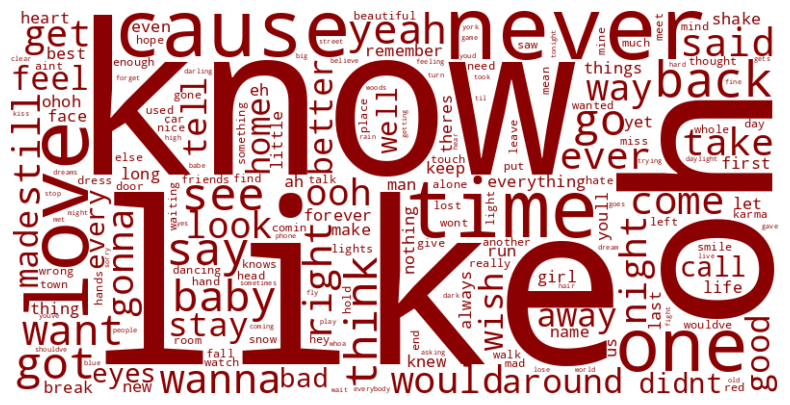

In [173]:
word_frequency_dict = {word: frequency for word, frequency in word_frequency}

# Paleta de cores de vermelho quase vinhooo
def ts_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(139, 0, 0)"  # Vermelho escuro

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=ts_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Agora, veremos a frequência de palavras em cada álbum.

In [174]:
# criando uma lista de todas as palavras que aparecem na discografia
album_word_lists = {nome: [] for nome in nomes}

for words, album_name in zip(lyrics['lyrics_tok'], lyrics['album_name']):
  if album_name in album_word_lists:
    album_word_lists[album_name].extend(words)

print(album_word_lists)

{'Taylor Swift': ['said', 'way', 'blue', 'eyes', 'shined', 'put', 'georgia', 'stars', 'shame', 'night', 'said', 'lie', 'boy', 'chevy', 'truck', 'tendency', 'gettin', 'stuck', 'back', 'roads', 'night', 'right', 'beside', 'summer', 'long', 'time', 'woke', 'find', 'summer', 'gone', 'think', 'tim', 'mcgraw', 'hope', 'think', 'favorite', 'song', 'one', 'danced', 'night', 'long', 'moon', 'like', 'spotlight', 'lake', 'think', 'happiness', 'hope', 'think', 'little', 'black', 'dress', 'think', 'head', 'chest', 'old', 'faded', 'blue', 'jeans', 'think', 'tim', 'mcgraw', 'hope', 'think', 'september', 'saw', 'month', 'tears', 'thankin', 'god', 'werent', 'see', 'like', 'box', 'beneath', 'bed', 'letter', 'never', 'read', 'three', 'summers', 'back', 'hard', 'find', 'little', 'bittersweet', 'lookin', 'back', 'nice', 'believe', 'think', 'tim', 'mcgraw', 'hope', 'think', 'favorite', 'song', 'one', 'danced', 'night', 'long', 'moon', 'like', 'spotlight', 'lake', 'think', 'happiness', 'hope', 'think', 'litt

In [175]:
#taylor swift

# descobrindo a frequência de cada palavra que é mencionada na discografia
ts_word_frequency = collections.Counter(album_word_lists[nomes[0]])
ts_word_frequency = sorted(ts_word_frequency.items(), key=lambda x: x[1], reverse=True)
ts_word_frequency

[('oh', 38),
 ('know', 36),
 ('think', 27),
 ('back', 26),
 ('never', 26),
 ('wanna', 26),
 ('see', 22),
 ('would', 22),
 ('said', 21),
 ('beautiful', 20),
 ('shouldve', 20),
 ('love', 19),
 ('cause', 19),
 ('song', 18),
 ('one', 18),
 ('like', 17),
 ('way', 15),
 ('time', 15),
 ('baby', 15),
 ('got', 15),
 ('everything', 14),
 ('take', 14),
 ('hope', 13),
 ('still', 13),
 ('eyes', 12),
 ('let', 12),
 ('smile', 12),
 ('first', 11),
 ('get', 11),
 ('girl', 11),
 ('break', 11),
 ('heart', 11),
 ('tell', 10),
 ('really', 10),
 ('home', 10),
 ('say', 10),
 ('right', 9),
 ('find', 9),
 ('little', 9),
 ('old', 9),
 ('ever', 9),
 ('go', 9),
 ('drive', 9),
 ('burn', 9),
 ('perfectly', 9),
 ('night', 8),
 ('drew', 8),
 ('want', 8),
 ('anyone', 8),
 ('wishing', 8),
 ('car', 8),
 ('need', 8),
 ('away', 8),
 ('late', 8),
 ('make', 8),
 ('good', 8),
 ('gone', 7),
 ('theres', 7),
 ('thing', 7),
 ('didnt', 7),
 ('gonna', 7),
 ('keep', 7),
 ('coming', 7),
 ('even', 7),
 ('reason', 7),
 ('light', 7),
 

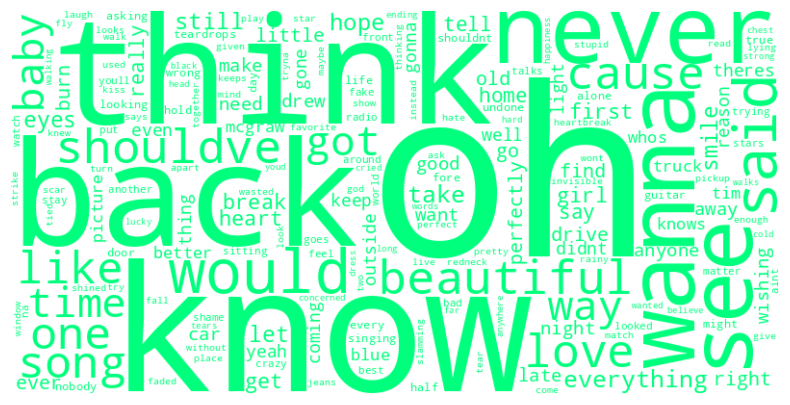

In [176]:
ts_word_frequency_dict = {word: frequency for word, frequency in ts_word_frequency}

def debut_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(0, 255, 125)"  # verde água

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=debut_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(ts_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [177]:
# fearless
fl_word_frequency = collections.Counter(album_word_lists[nomes[1]])
fl_word_frequency = sorted(fl_word_frequency.items(), key=lambda x: x[1], reverse=True)
fl_word_frequency

[('know', 81),
 ('oh', 74),
 ('come', 55),
 ('baby', 52),
 ('cause', 52),
 ('like', 52),
 ('feel', 45),
 ('said', 43),
 ('never', 42),
 ('way', 41),
 ('back', 41),
 ('say', 39),
 ('time', 39),
 ('see', 35),
 ('love', 33),
 ('got', 32),
 ('everything', 31),
 ('mr', 28),
 ('well', 27),
 ('one', 27),
 ('bye', 26),
 ('night', 24),
 ('always', 24),
 ('rains', 24),
 ('fall', 22),
 ('around', 21),
 ('tell', 21),
 ('help', 20),
 ('today', 20),
 ('little', 19),
 ('gonna', 19),
 ('fairytale', 19),
 ('wanna', 18),
 ('go', 18),
 ('right', 17),
 ('want', 17),
 ('name', 17),
 ('sorry', 17),
 ('smile', 17),
 ('take', 16),
 ('every', 16),
 ('nothing', 16),
 ('still', 16),
 ('forever', 16),
 ('rain', 15),
 ('jump', 15),
 ('yeah', 14),
 ('knew', 14),
 ('feeling', 14),
 ('thought', 14),
 ('leave', 14),
 ('ah', 14),
 ('theres', 13),
 ('best', 13),
 ('eyes', 13),
 ('day', 13),
 ('youll', 13),
 ('things', 13),
 ('didnt', 13),
 ('away', 13),
 ('waiting', 13),
 ('face', 13),
 ('need', 13),
 ('happy', 13),
 ('

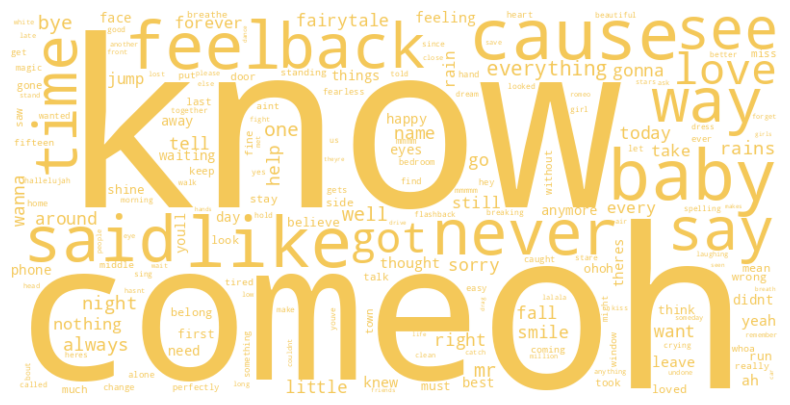

In [178]:
fl_word_frequency_dict = {word: frequency for word, frequency in fl_word_frequency}

def fl_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(244, 200, 89)"  # lilás

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=fl_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(fl_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [179]:
# speak now
sn_word_frequency = collections.Counter(album_word_lists[nomes[2]])
sn_word_frequency = sorted(sn_word_frequency.items(), key=lambda x: x[1], reverse=True)
sn_word_frequency

[('like', 65),
 ('know', 60),
 ('see', 57),
 ('never', 53),
 ('love', 49),
 ('time', 46),
 ('back', 44),
 ('oh', 44),
 ('say', 36),
 ('go', 35),
 ('ever', 34),
 ('cause', 33),
 ('one', 33),
 ('come', 33),
 ('still', 31),
 ('away', 28),
 ('gonna', 27),
 ('would', 26),
 ('life', 25),
 ('around', 24),
 ('way', 24),
 ('grow', 23),
 ('mind', 22),
 ('mean', 22),
 ('long', 21),
 ('mine', 20),
 ('got', 20),
 ('take', 20),
 ('right', 19),
 ('said', 19),
 ('wont', 19),
 ('think', 19),
 ('meet', 18),
 ('yeah', 17),
 ('forever', 17),
 ('wouldve', 17),
 ('thought', 16),
 ('eyes', 16),
 ('little', 16),
 ('day', 16),
 ('let', 16),
 ('fly', 15),
 ('someday', 15),
 ('us', 15),
 ('things', 14),
 ('make', 14),
 ('baby', 14),
 ('wish', 14),
 ('watch', 14),
 ('la', 14),
 ('remember', 13),
 ('first', 13),
 ('made', 13),
 ('tell', 13),
 ('night', 13),
 ('gone', 13),
 ('name', 13),
 ('live', 13),
 ('saw', 12),
 ('look', 12),
 ('get', 12),
 ('touch', 12),
 ('run', 12),
 ('keep', 12),
 ('knew', 12),
 ('nothing'

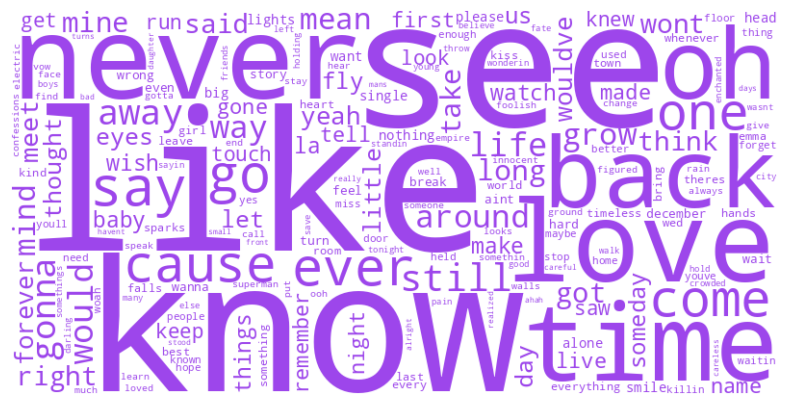

In [180]:
sn_word_frequency_dict = {word: frequency for word, frequency in sn_word_frequency}

def sn_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(157, 70, 235)"  # lilás

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=sn_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(sn_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [181]:
# red
red_word_frequency = collections.Counter(album_word_lists[nomes[3]])
red_word_frequency = sorted(red_word_frequency.items(), key=lambda x: x[1], reverse=True)
red_word_frequency

[('like', 131),
 ('know', 120),
 ('time', 100),
 ('oh', 96),
 ('never', 79),
 ('one', 71),
 ('back', 61),
 ('love', 56),
 ('red', 51),
 ('better', 50),
 ('last', 47),
 ('ever', 43),
 ('yeah', 43),
 ('run', 42),
 ('ooh', 40),
 ('remember', 39),
 ('cause', 38),
 ('night', 38),
 ('go', 37),
 ('think', 35),
 ('well', 35),
 ('say', 33),
 ('stay', 33),
 ('trouble', 33),
 ('away', 31),
 ('got', 29),
 ('wanna', 29),
 ('bet', 27),
 ('take', 27),
 ('come', 26),
 ('home', 26),
 ('said', 26),
 ('tell', 25),
 ('asking', 25),
 ('knows', 24),
 ('getting', 23),
 ('babe', 23),
 ('miss', 23),
 ('man', 23),
 ('everything', 22),
 ('look', 22),
 ('everybody', 22),
 ('starlight', 22),
 ('right', 21),
 ('still', 21),
 ('call', 21),
 ('twentytwo', 20),
 ('wish', 20),
 ('alone', 19),
 ('talk', 19),
 ('made', 18),
 ('girl', 17),
 ('eyes', 16),
 ('long', 16),
 ('name', 16),
 ('didnt', 16),
 ('knew', 16),
 ('dancing', 15),
 ('best', 15),
 ('mad', 15),
 ('feel', 15),
 ('fall', 14),
 ('let', 14),
 ('new', 14),
 ('s

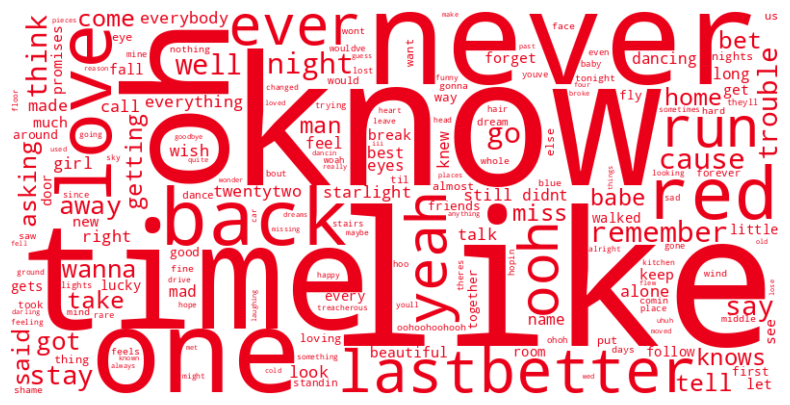

In [182]:
red_word_frequency_dict = {word: frequency for word, frequency in red_word_frequency}

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(234, 0, 24)"  # vermelho

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=red_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(red_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [183]:
# 1989
um989_word_frequency = collections.Counter(album_word_lists[nomes[4]])
um989_word_frequency = sorted(um989_word_frequency.items(), key=lambda x: x[1], reverse=True)
um989_word_frequency

[('oh', 122),
 ('love', 94),
 ('shake', 78),
 ('eh', 72),
 ('yet', 64),
 ('wish', 62),
 ('got', 56),
 ('new', 45),
 ('back', 44),
 ('like', 42),
 ('baby', 42),
 ('go', 41),
 ('never', 39),
 ('ohoh', 39),
 ('cause', 38),
 ('woods', 38),
 ('clear', 37),
 ('know', 36),
 ('hey', 34),
 ('say', 34),
 ('would', 34),
 ('stay', 33),
 ('york', 30),
 ('gonna', 30),
 ('welcome', 29),
 ('ah', 27),
 ('lights', 25),
 ('good', 25),
 ('girl', 25),
 ('come', 24),
 ('want', 23),
 ('bad', 23),
 ('think', 23),
 ('way', 22),
 ('home', 22),
 ('weve', 21),
 ('play', 19),
 ('wonderland', 19),
 ('see', 18),
 ('forever', 18),
 ('fake', 18),
 ('hate', 17),
 ('silence', 17),
 ('take', 16),
 ('blood', 16),
 ('get', 15),
 ('break', 15),
 ('right', 15),
 ('look', 14),
 ('tell', 14),
 ('long', 14),
 ('places', 14),
 ('us', 13),
 ('every', 13),
 ('remember', 13),
 ('came', 13),
 ('let', 13),
 ('gone', 13),
 ('works', 13),
 ('ever', 13),
 ('lost', 13),
 ('finally', 13),
 ('time', 12),
 ('people', 12),
 ('mad', 12),
 ('y

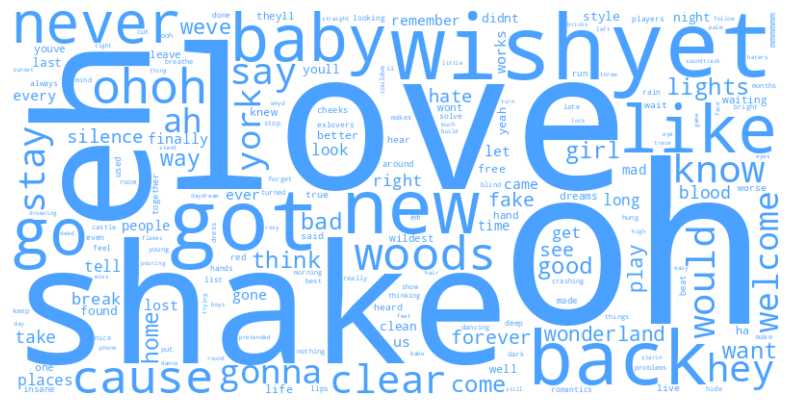

In [184]:
um989_word_frequency_dict = {word: frequency for word, frequency in um989_word_frequency}

def um989_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(74, 161, 255)"  # azuuul

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=um989_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(um989_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [185]:
# reputation
rep_word_frequency = collections.Counter(album_word_lists[nomes[5]])
rep_word_frequency = sorted(rep_word_frequency.items(), key=lambda x: x[1], reverse=True)
rep_word_frequency

[('made', 53),
 ('like', 52),
 ('want', 50),
 ('look', 48),
 ('call', 46),
 ('oh', 37),
 ('wanna', 37),
 ('ooh', 35),
 ('cause', 35),
 ('time', 34),
 ('know', 33),
 ('baby', 33),
 ('first', 32),
 ('yeah', 32),
 ('bad', 31),
 ('say', 28),
 ('good', 28),
 ('never', 27),
 ('one', 27),
 ('take', 26),
 ('hands', 24),
 ('things', 23),
 ('hold', 23),
 ('getaway', 22),
 ('car', 22),
 ('dancing', 22),
 ('end', 21),
 ('got', 21),
 ('waiting', 21),
 ('feel', 20),
 ('ha', 20),
 ('game', 19),
 ('whoa', 19),
 ('', 19),
 ('face', 19),
 ('said', 18),
 ('love', 17),
 ('let', 17),
 ('right', 16),
 ('back', 16),
 ('gorgeous', 16),
 ('tied', 16),
 ('big', 15),
 ('aint', 15),
 ('make', 15),
 ('think', 15),
 ('light', 15),
 ('delicate', 15),
 ('nothing', 14),
 ('get', 14),
 ('heart', 14),
 ('nice', 14),
 ('see', 13),
 ('games', 13),
 ('life', 13),
 ('night', 12),
 ('dreams', 12),
 ('every', 12),
 ('begin', 12),
 ('soul', 12),
 ('usin', 12),
 ('goes', 12),
 ('go', 11),
 ('reputation', 11),
 ('ah', 11),
 ('bo

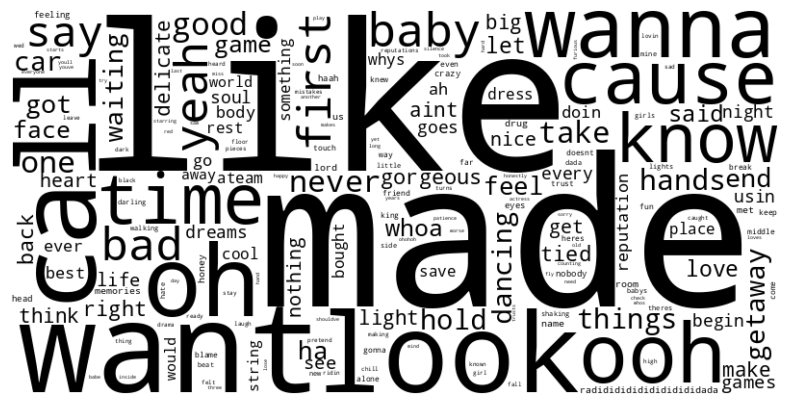

In [186]:
rep_word_frequency_dict = {word: frequency for word, frequency in rep_word_frequency}

def rep_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(0, 0, 0)"  # preto

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=rep_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(rep_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [187]:
# lover
lover_word_frequency = collections.Counter(album_word_lists[nomes[6]])
lover_word_frequency = sorted(lover_word_frequency.items(), key=lambda x: x[1], reverse=True)
lover_word_frequency

[('like', 68),
 ('want', 51),
 ('love', 44),
 ('never', 43),
 ('see', 43),
 ('wanna', 42),
 ('oh', 40),
 ('daylight', 40),
 ('know', 38),
 ('one', 36),
 ('cause', 33),
 ('get', 32),
 ('ohoh', 31),
 ('baby', 29),
 ('man', 29),
 ('right', 28),
 ('go', 28),
 ('yeah', 25),
 ('ooh', 25),
 ('say', 23),
 ('street', 23),
 ('think', 22),
 ('still', 21),
 ('youll', 19),
 ('walk', 19),
 ('need', 19),
 ('home', 18),
 ('away', 17),
 ('night', 17),
 ('bad', 17),
 ('got', 16),
 ('cornelia', 16),
 ('darling', 15),
 ('bless', 15),
 ('gonna', 15),
 ('even', 14),
 ('', 14),
 ('boy', 14),
 ('tell', 14),
 ('ever', 14),
 ('soon', 13),
 ('back', 13),
 ('ah', 13),
 ('better', 13),
 ('things', 13),
 ('would', 12),
 ('hate', 12),
 ('okay', 12),
 ('knows', 12),
 ('lose', 12),
 ('oohah', 12),
 ('thought', 11),
 ('blue', 11),
 ('theres', 11),
 ('take', 11),
 ('uh', 11),
 ('nice', 10),
 ('whole', 10),
 ('coming', 10),
 ('aint', 10),
 ('stay', 10),
 ('look', 10),
 ('find', 10),
 ('fancy', 10),
 ('worship', 10),
 ('f

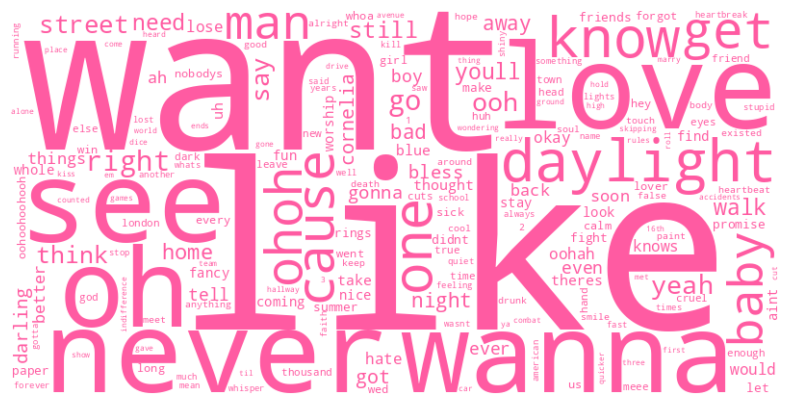

In [188]:
lover_word_frequency_dict = {word: frequency for word, frequency in lover_word_frequency}

def lover_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, 91, 162)"  # rosa

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=lover_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(lover_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [189]:
# folklore
folk_word_frequency = collections.Counter(album_word_lists[nomes[7]])
folk_word_frequency = sorted(folk_word_frequency.items(), key=lambda x: x[1], reverse=True)
folk_word_frequency

[('never', 46),
 ('know', 42),
 ('like', 41),
 ('time', 38),
 ('would', 22),
 ('think', 21),
 ('one', 20),
 ('cause', 19),
 ('gave', 19),
 ('knew', 18),
 ('around', 18),
 ('didnt', 17),
 ('see', 15),
 ('still', 15),
 ('youd', 14),
 ('love', 14),
 ('want', 14),
 ('said', 13),
 ('come', 13),
 ('back', 13),
 ('mad', 13),
 ('seen', 12),
 ('give', 12),
 ('showed', 11),
 ('woman', 11),
 ('everything', 11),
 ('get', 11),
 ('call', 11),
 ('hope', 11),
 ('watch', 10),
 ('trying', 10),
 ('mine', 10),
 ('wouldve', 9),
 ('enough', 9),
 ('heart', 9),
 ('signs', 9),
 ('things', 9),
 ('tell', 9),
 ('pulled', 9),
 ('wanted', 8),
 ('thing', 8),
 ('nothing', 8),
 ('say', 8),
 ('us', 8),
 ('warning', 8),
 ('sign', 8),
 ('many', 8),
 ('look', 8),
 ('made', 7),
 ('something', 7),
 ('town', 7),
 ('marvelous', 7),
 ('film', 7),
 ('even', 7),
 ('times', 7),
 ('go', 7),
 ('make', 7),
 ('summer', 7),
 ('went', 7),
 ('take', 6),
 ('home', 6),
 ('long', 6),
 ('miss', 6),
 ('mind', 6),
 ('name', 6),
 ('little', 6)

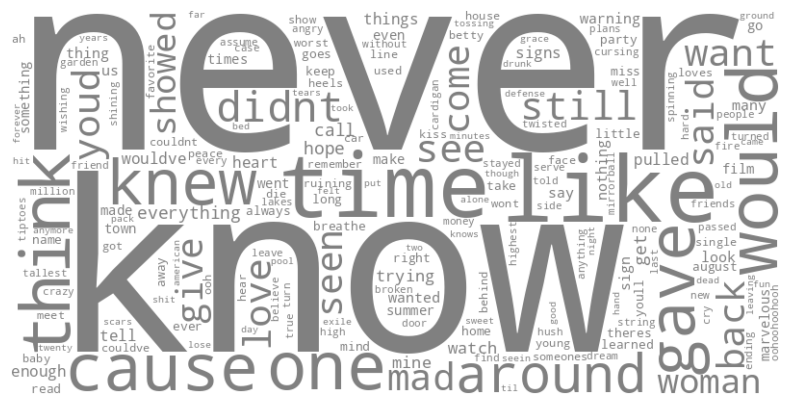

In [190]:
folk_word_frequency_dict = {word: frequency for word, frequency in folk_word_frequency}

def folk_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(128, 128, 128)"  # cinza

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=folk_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(folk_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [191]:
# evermore
eve_word_frequency = collections.Counter(album_word_lists[nomes[8]])
eve_word_frequency = sorted(eve_word_frequency.items(), key=lambda x: x[1], reverse=True)
eve_word_frequency

[('know', 59),
 ('like', 49),
 ('right', 27),
 ('think', 27),
 ('', 24),
 ('thing', 23),
 ('left', 23),
 ('never', 20),
 ('one', 20),
 ('go', 20),
 ('time', 19),
 ('got', 19),
 ('didnt', 19),
 ('love', 18),
 ('stay', 18),
 ('man', 15),
 ('died', 14),
 ('oh', 14),
 ('still', 14),
 ('better', 14),
 ('hand', 13),
 ('yeah', 13),
 ('sometimes', 13),
 ('eyes', 13),
 ('long', 13),
 ('take', 12),
 ('good', 12),
 ('happiness', 12),
 ('dead', 12),
 ('alive', 12),
 ('yes', 12),
 ('head', 11),
 ('leave', 11),
 ('tell', 11),
 ('get', 11),
 ('ooh', 11),
 ('begging', 10),
 ('life', 10),
 ('would', 10),
 ('call', 10),
 ('cause', 10),
 ('ever', 10),
 ('prove', 10),
 ('closure', 10),
 ('say', 9),
 ('every', 9),
 ('everybody', 9),
 ('house', 9),
 ('always', 9),
 ('day', 9),
 ('old', 9),
 ('soul', 9),
 ('story', 9),
 ('body', 9),
 ('evermore', 9),
 ('lost', 8),
 ('wreck', 8),
 ('plans', 8),
 ('friends', 8),
 ('watch', 8),
 ('find', 8),
 ('around', 8),
 ('gonna', 8),
 ('light', 8),
 ('dorothea', 8),
 ('pai

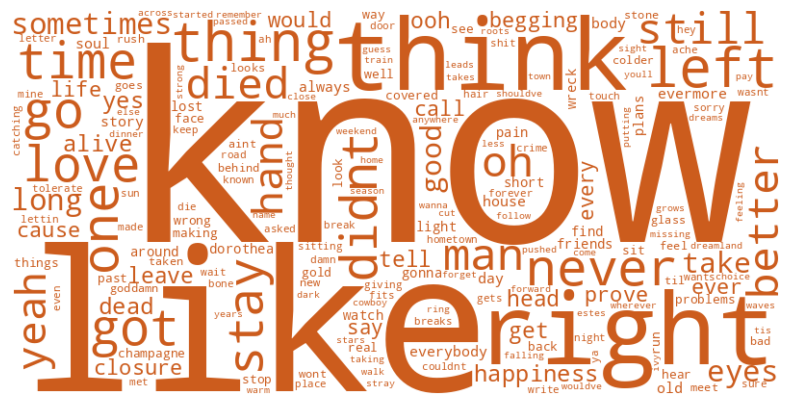

In [192]:
eve_word_frequency_dict = {word: frequency for word, frequency in eve_word_frequency}

def eve_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(204, 92, 29)"  # âmbar

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=eve_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(eve_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [193]:
# midnights
mn_word_frequency = collections.Counter(album_word_lists[nomes[9]])
mn_word_frequency = sorted(mn_word_frequency.items(), key=lambda x: x[1], reverse=True)
mn_word_frequency

[('like', 103),
 ('karma', 50),
 ('cause', 45),
 ('oh', 40),
 ('never', 39),
 ('snow', 39),
 ('love', 34),
 ('beach', 31),
 ('time', 30),
 ('comin', 30),
 ('around', 29),
 ('yeah', 24),
 ('still', 24),
 ('get', 23),
 ('one', 23),
 ('know', 23),
 ('different', 20),
 ('wanted', 20),
 ('say', 19),
 ('always', 18),
 ('wouldve', 18),
 ('friends', 17),
 ('sweet', 17),
 ('thought', 16),
 ('someone', 16),
 ('make', 16),
 ('hits', 16),
 ('shit', 15),
 ('find', 15),
 ('couldve', 15),
 ('fallin', 15),
 ('dancing', 14),
 ('got', 14),
 ('dream', 14),
 ('another', 14),
 ('ever', 13),
 ('gonna', 13),
 ('see', 13),
 ('saw', 13),
 ('ask', 13),
 ('put', 13),
 ('karmas', 13),
 ('uhhuh', 13),
 ('home', 12),
 ('night', 12),
 ('flying', 12),
 ('take', 12),
 ('said', 12),
 ('right', 12),
 ('somewhere', 12),
 ('feel', 11),
 ('damn', 11),
 ('room', 11),
 ('wanting', 11),
 ('tonight', 11),
 ('wish', 11),
 ('didnt', 11),
 ('whole', 11),
 ('god', 11),
 ('haze', 10),
 ('keep', 10),
 ('girl', 10),
 ('real', 10),
 (

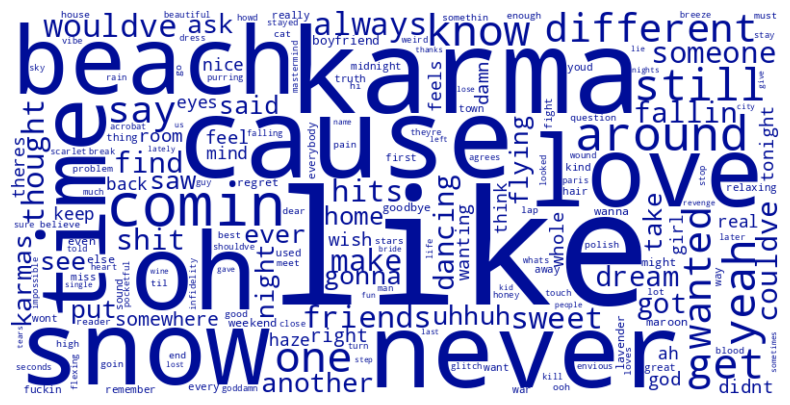

In [194]:
mn_word_frequency_dict = {word: frequency for word, frequency in mn_word_frequency}

def mn_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(0, 13, 152)"  # azul royal

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=mn_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(mn_word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Analisando Sentimentos Positivos e Negativos

Agora, iremos analisar os sentimentos da Taylor Swift ao longo dos anos utilizando o Vader.

In [195]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [196]:
sia = SentimentIntensityAnalyzer()

In [197]:
lyrics['polarity2'] = lyrics['lyric'].apply(lambda x: sia.polarity_scores(x))
lyrics.head()

album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line album_year  \
0          He said the way my blue eyes shined     1       2006   
1  Put those Georgia stars to shame that night     2       2006   
2                       I said, "That's a lie"     3       2006   
3                  Just a boy in a Chevy truck     4       2006   
4         That had a tendency of gettin' stuck     5       2006   

                     clean_lyric                           lyrics_tok  \
0      said way blue eyes shined      [said, way, blue, eyes, shined]   
1  put georgia stars shame night  [put, georgia, stars, shame, night]   
2                       said lie                          [said, lie]   
3                boy chevy truck                  [boy, chevy, truck]   
4          tendency gettin stuck            [tendency, gettin, stuck]   

                                            polarity    neg    neu  pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
1  {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp...  0.307  0.693  0.0   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.0   
4  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...  0.286  0.714  0.0   

   compoud                                          polarity2  compound  
0   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  -0.4767  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...   -0.4767  
2   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3   0.0000  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  -0.2500  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.2500

In [198]:
lyrics[['neg', 'neu', 'pos', 'compound']] = lyrics['polarity2'].apply(pd.Series)
lyrics.drop('polarity', axis = 1)

album_name    track_title  track_n  \
0                         Taylor Swift     Tim McGraw        1   
1                         Taylor Swift     Tim McGraw        1   
2                         Taylor Swift     Tim McGraw        1   
3                         Taylor Swift     Tim McGraw        1   
4                         Taylor Swift     Tim McGraw        1   
...                                ...            ...      ...   
1191  Midnights (The Til Dawn Edition)  Karma (Remix)       23   
1192  Midnights (The Til Dawn Edition)  Karma (Remix)       23   
1193  Midnights (The Til Dawn Edition)  Karma (Remix)       23   
1194  Midnights (The Til Dawn Edition)  Karma (Remix)       23   
1195  Midnights (The Til Dawn Edition)  Karma (Remix)       23   

                                            lyric  line album_year  \
0             He said the way my blue eyes shined     1       2006   
1     Put those Georgia stars to shame that night     2       2006   
2                          I said, "That's a lie"     3       2006   
3                     Just a boy in a Chevy truck     4       2006   
4            That had a tendency of gettin' stuck     5       2006   
...                                           ...   ...        ...   
1191                        Karma is my boyfriend    61       2022   
1192                          Karma is a god (Ah)    62       2022   
1193                     Karma is my bestie (Mmm)    63       2022   
1194                   Karma's a relaxing thought    64       2022   
1195                  Karma's gonna hold you down    65       2022   

                        clean_lyric                           lyrics_tok  \
0         said way blue eyes shined      [said, way, blue, eyes, shined]   
1     put georgia stars shame night  [put, georgia, stars, shame, night]   
2                          said lie                          [said, lie]   
3                   boy chevy truck                  [boy, chevy, truck]   
4             tendency gettin stuck            [tendency, gettin, stuck]   
...                             ...                                  ...   
1191                karma boyfriend                   [karma, boyfriend]   
1192                   karma god ah                     [karma, god, ah]   
1193               karma bestie mmm                 [karma, bestie, mmm]   
1194        karmas relaxing thought          [karmas, relaxing, thought]   
1195              karmas gonna hold                [karmas, gonna, hold]   

        neg    neu    pos  compoud  \
0     0.000  1.000  0.000   0.0000   
1     0.307  0.693  0.000  -0.4767   
2     0.000  1.000  0.000   0.0000   
3     0.000  1.000  0.000   0.0000   
4     0.286  0.714  0.000  -0.2500   
...     ...    ...    ...      ...   
1191  0.000  1.000  0.000   0.0000   
1192  0.000  0.588  0.412   0.2732   
1193  0.000  1.000  0.000   0.0000   
1194  0.000  0.385  0.615   0.4939   
1195  0.000  1.000  0.000   0.0000   

                                              polarity2  compound  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1     {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...   -0.4767  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4     {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.2500  
...                                                 ...       ...  
1191  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1192  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...    0.2732  
1193  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1194  {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...    0.4939  
1195  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  

[10203 rows x 14 columns]

<ipython-input-199-2f282d2dff4a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sentiment= lyrics.groupby('album_year').sum().reset_index()


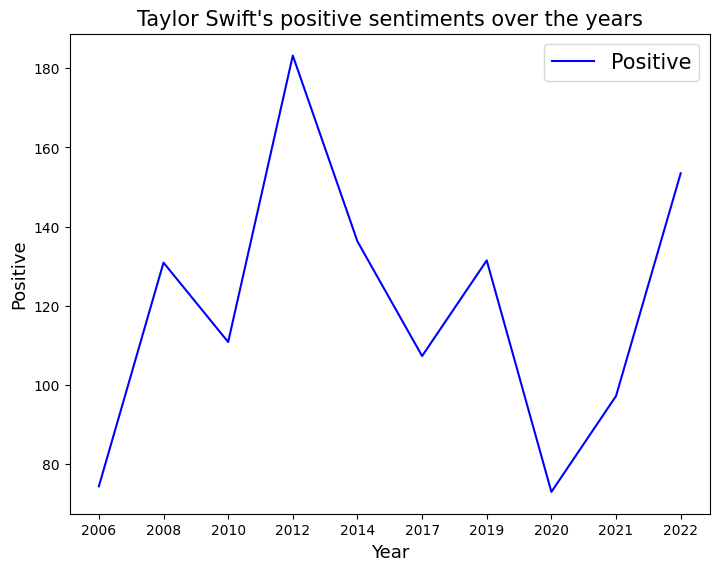

In [199]:
yearly_sentiment= lyrics.groupby('album_year').sum().reset_index()

fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(yearly_sentiment['album_year'], yearly_sentiment['pos'], color= 'blue')

eixo.set_title("Taylor Swift's positive sentiments over the years", fontsize=15)
eixo.set_ylabel('Positive', fontsize=13)
eixo.set_xlabel('Year', fontsize=13)
eixo.legend(['Positive'], loc = 'upper right', fontsize=15)

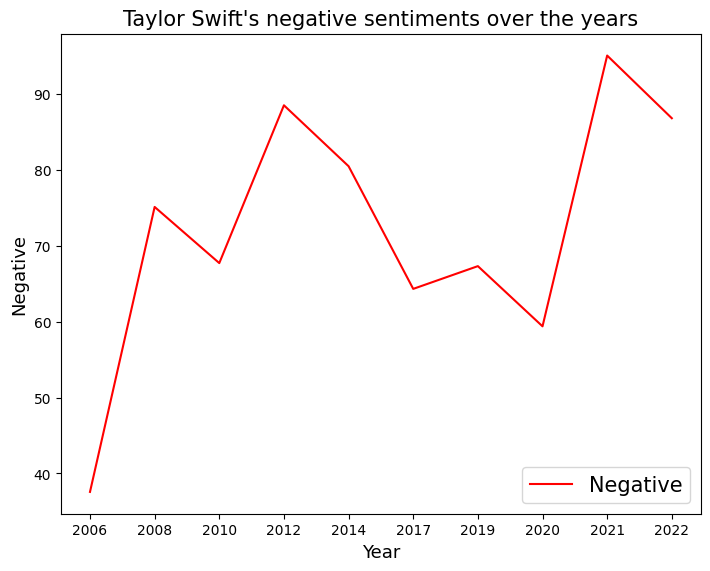

In [200]:
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(yearly_sentiment['album_year'], yearly_sentiment['neg'], color= 'red')

eixo.set_title("Taylor Swift's negative sentiments over the years", fontsize=15)
eixo.set_ylabel('Negative', fontsize=13)
eixo.set_xlabel('Year', fontsize=13)
eixo.legend(['Negative'], loc = 'lower right', fontsize=15)

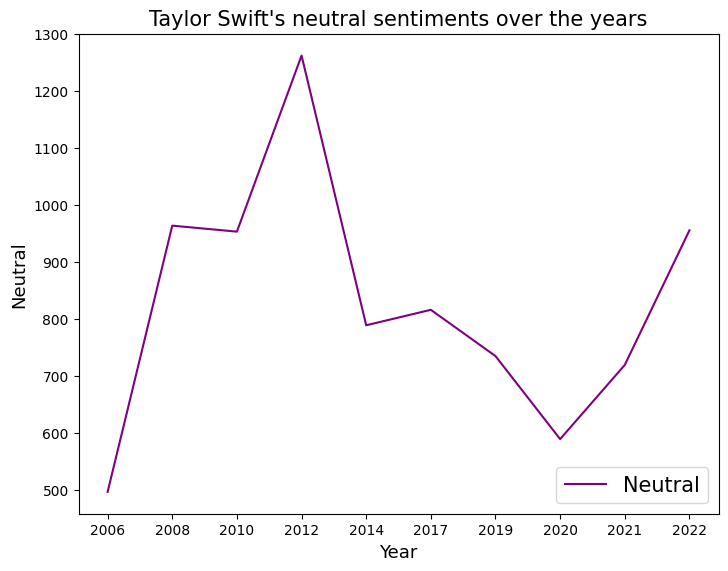

In [201]:
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(yearly_sentiment['album_year'], yearly_sentiment['neu'], color= 'purple')

eixo.set_title("Taylor Swift's neutral sentiments over the years", fontsize=15)
eixo.set_ylabel('Neutral', fontsize=13)
eixo.set_xlabel('Year', fontsize=13)
eixo.legend(['Neutral'], loc = 'lower right', fontsize=15)